# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

C:\Users\stepa\AppData\Local\Temp\ipykernel_21912\3107362156.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f.show()


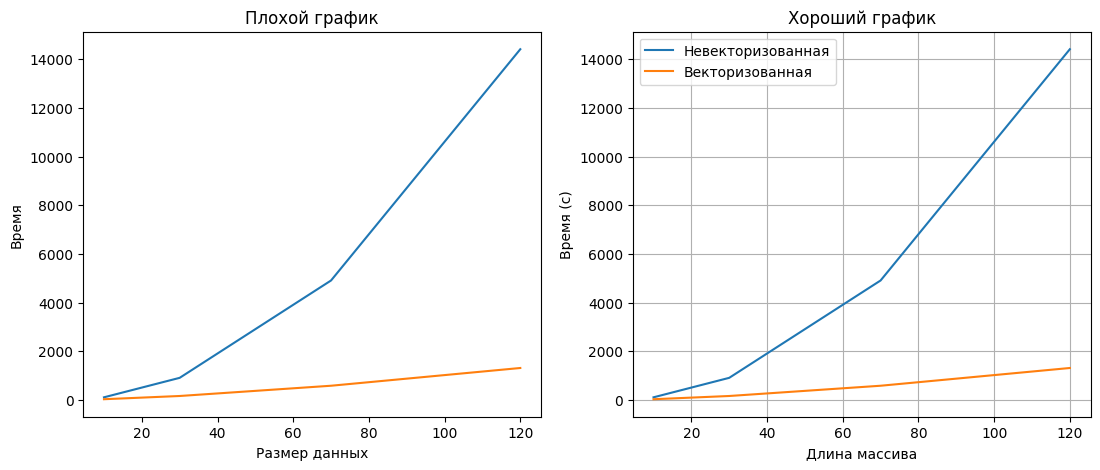

In [3]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

c:\Users\stepa\OneDrive\Рабочий стол\task\functions.py:7: RuntimeWarning: overflow encountered in scalar multiply
  p *= x[i][i]


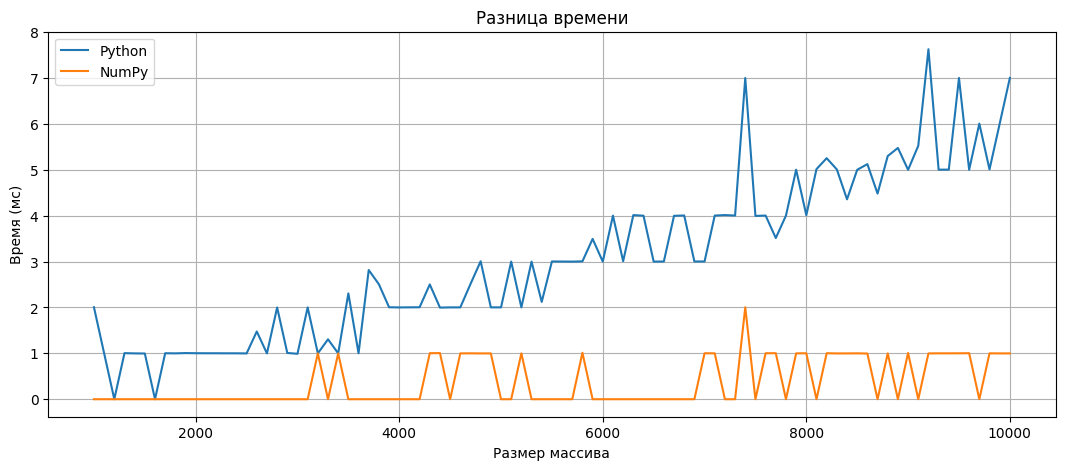

In [25]:
import functions
import functions_vectorized
import time 

# Задаем размеры тестов
sizes = []
for i in range(1000, 10001, 100):
    sizes.append(i)

# Создаем массивы по которым будем строить графики
time_non_vectorized = np.zeros(len(sizes))
time_vectorized = np.zeros(len(sizes))

# Создаем тесты
for i in range(len(sizes)):
    # Создаем массив случайных чисел до 100 размером sz X sz
    rndArray = np.random.randint(100, size=(sizes[i], sizes[i])) 

    # Считаем время не NumPy
    t = time.time() * 1000
    functions.prod_non_zero_diag(rndArray)
    # Сохраняем результат
    time_non_vectorized[i] = time.time() * 1000 - t

    # Считаем время NumPy 
    t = time.time() * 1000
    functions_vectorized.prod_non_zero_diag(rndArray)
    # Сохраняем время
    time_vectorized[i] = time.time() * 1000 - t
    i += 1

# Создаем график
f, ax2 = plt.subplots(1, 1, figsize=(13, 5))  

ax2.plot(sizes, time_non_vectorized, label="Python")
ax2.plot(sizes, time_vectorized, label="NumPy")
ax2.set_title(u"Разница времени")
ax2.set_xlabel(u"Размер массива")
ax2.set_ylabel(u"Время (мс)")
ax2.grid()
ax2.legend()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


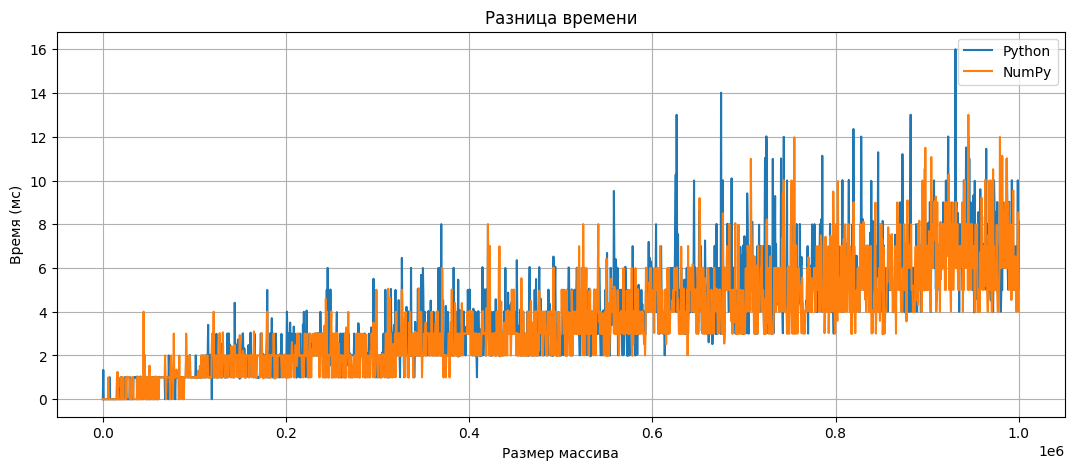

In [ ]:
import functions
import functions_vectorized
import time 

# Задаем размеры тестов
sizes = []
for i in range(0, 1000001, 500):
    sizes.append(i)

# Создаем массивы по которым будем строить графики
time_non_vectorized = np.zeros(len(sizes))
time_vectorized = np.zeros(len(sizes))

# Создаем тесты
for i in range(len(sizes)):
    # Создаем массив случайных чисел до 100 размером sz X sz
    rndArray1 = np.random.randint(1000, size=sizes[i]) 
    rndArray2 = np.random.randint(1000, size=sizes[i])

    # Считаем время не NumPy
    t = time.time() * 1000
    functions.are_multisets_equal(rndArray1, rndArray2)
    # Сохраняем результат
    time_non_vectorized[i] = time.time() * 1000 - t

    # Считаем время NumPy 
    t = time.time() * 1000
    functions_vectorized.are_multisets_equal(rndArray1, rndArray2)
    # Сохраняем время
    time_vectorized[i] = time.time() * 1000 - t

# Создаем график
f, ax2 = plt.subplots(1, 1, figsize=(13, 5))  

ax2.plot(sizes, time_non_vectorized, label="Python")
ax2.plot(sizes, time_vectorized, label="NumPy")
ax2.set_title(u"Разница времени")
ax2.set_xlabel(u"Размер массива")
ax2.set_ylabel(u"Время (мс)")
ax2.grid()
ax2.legend()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

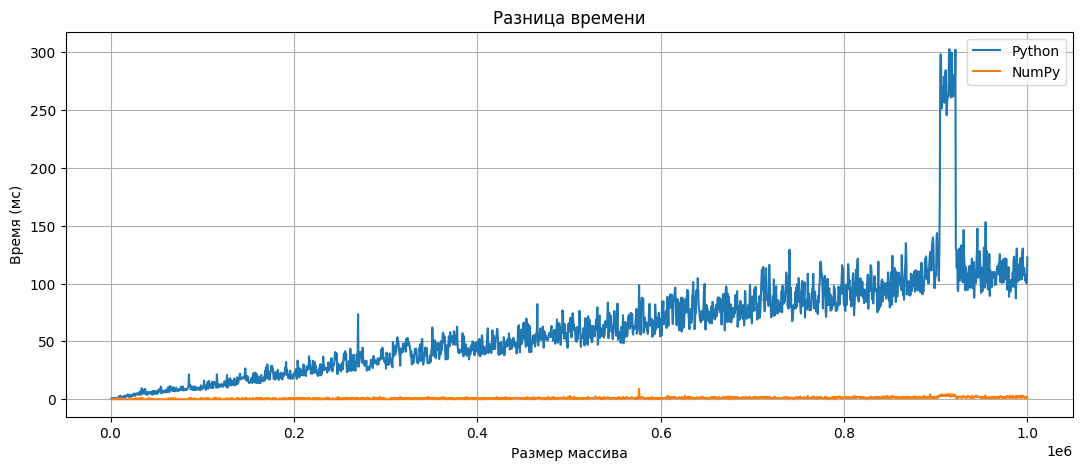

In [36]:
import functions
import functions_vectorized
import time 

# Задаем размеры тестов
sizes = []
for i in range(1000, 1000001, 500):
    sizes.append(i)

# Создаем массивы по которым будем строить графики
time_non_vectorized = np.zeros(len(sizes))
time_vectorized = np.zeros(len(sizes))

# Создаем тесты
for i in range(len(sizes)):
    # Создаем массив случайных чисел до 100 размером sz X sz
    rndArray = np.random.randint(1000, size=(sizes[i])) 

    # Считаем время не NumPy
    t = time.time() * 1000
    functions.max_after_zero(rndArray)
    # Сохраняем результат
    time_non_vectorized[i] = time.time() * 1000 - t

    # Считаем время NumPy 
    t = time.time() * 1000
    functions_vectorized.max_after_zero(rndArray)
    # Сохраняем время
    time_vectorized[i] = time.time() * 1000 - t

# Создаем график
f, ax2 = plt.subplots(1, 1, figsize=(13, 5))  

ax2.plot(sizes, time_non_vectorized, label="Python")
ax2.plot(sizes, time_vectorized, label="NumPy")
ax2.set_title(u"Разница времени")
ax2.set_xlabel(u"Размер массива")
ax2.set_ylabel(u"Время (мс)")
ax2.grid()
ax2.legend()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


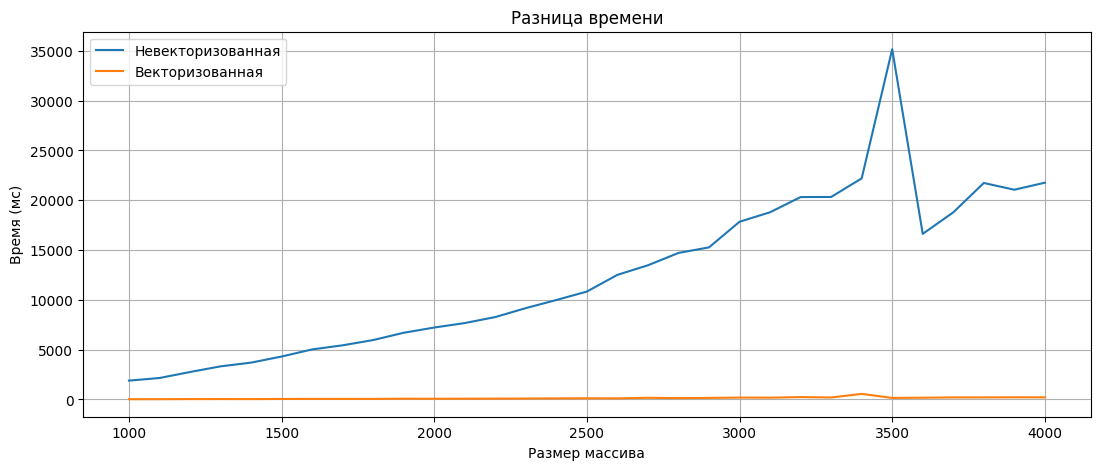

In [38]:
import importlib
import functions
import functions_vectorized
import numpy as np
import matplotlib.pyplot as plt
import time
importlib.reload(functions)
importlib.reload(functions_vectorized)


size = []
for i in range(1000, 4001, 100):
    size.append(i)
time_non_vectorized = np.zeros(len(size))
time_vectorized = np.zeros(len(size))

for i in range(0, len(size)):
    img = np.random.rand(size[i], size[i], 3) * 256
    coefs = np.random.random(3)

    t = time.time() * 1000
    functions.convert_image(img, coefs)
    time_non_vectorized[i] = time.time() * 1000 - t

    t = time.time() * 1000
    functions_vectorized.convert_image(img, coefs)
    time_vectorized[i] = time.time() * 1000 - t

f, ax2 = plt.subplots(1, 1, figsize=(13, 5))  

ax2.plot(size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Разница времени")
ax2.set_xlabel(u"Размер массива")
ax2.set_ylabel(u"Время (мс)")
ax2.grid() 
ax2.legend()  

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

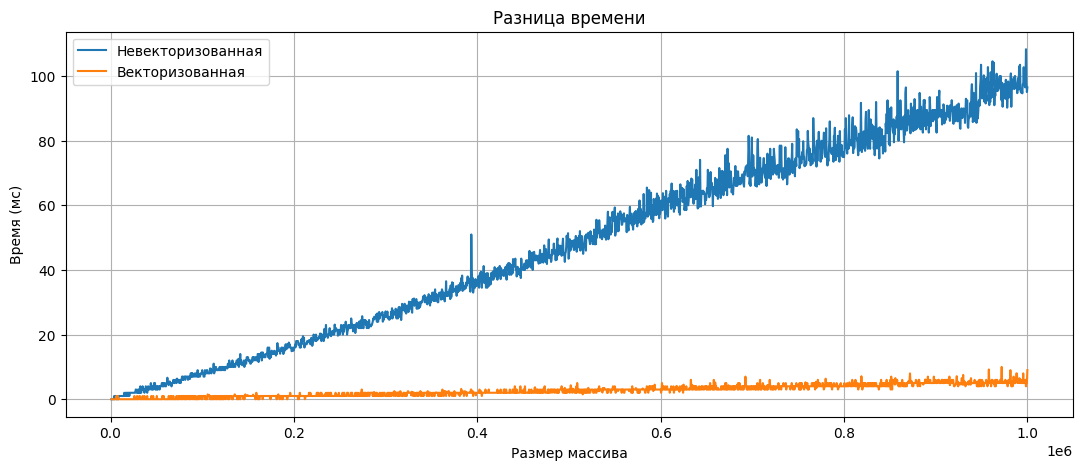

In [42]:
import importlib
import functions
import functions_vectorized
import numpy as np
import matplotlib.pyplot as plt
import time
importlib.reload(functions)
importlib.reload(functions_vectorized)


size = []
for i in range(1000, 1000001, 500):
    size.append(i)
time_non_vectorized = np.zeros(len(size))
time_vectorized = np.zeros(len(size))

for i in range(0, len(size)):
    M = np.random.randint(-50,50, size = size[i])

    t = time.time() * 1000
    functions.run_length_encoding(M)
    time_non_vectorized[i] = time.time() * 1000 - t

    t = time.time() * 1000
    functions_vectorized.run_length_encoding(M)
    time_vectorized[i] = time.time() * 1000 - t

f, ax2 = plt.subplots(1, 1, figsize=(13, 5))  

ax2.plot(size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Разница времени")
ax2.set_xlabel(u"Размер массива")
ax2.set_ylabel(u"Время (мс)")
ax2.grid() 
ax2.legend()  

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

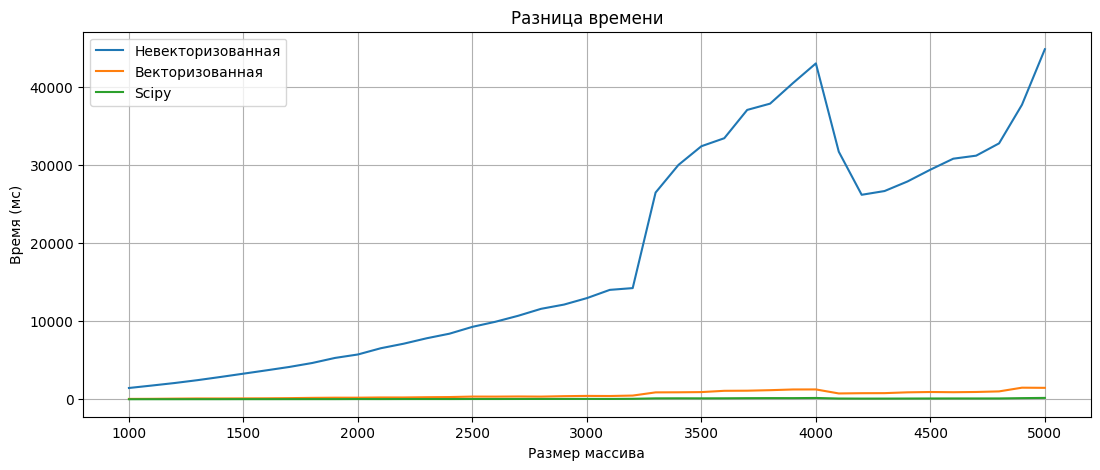

In [1]:
import importlib
import scipy.spatial
import functions
import functions_vectorized
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy
importlib.reload(functions)
importlib.reload(functions_vectorized)


data_size = []
for i in range(1000, 5001, 100):
    data_size.append(i)
time_non_vectorized = np.zeros(len(data_size))
time_vectorized = np.zeros(len(data_size))
time_scipy = np.zeros(len(data_size))

for i in range(0, len(data_size)):
    x = np.random.rand(data_size[i], 2)
    y = np.random.rand(data_size[i], 2)

    t = time.time() * 1000
    functions.pairwise_distance(x, y)
    time_non_vectorized[i] = time.time() * 1000 - t

    t = time.time() * 1000
    functions_vectorized.pairwise_distance(x, y)
    time_vectorized[i] = time.time() * 1000 - t

    t = time.time() * 1000
    scipy.spatial.distance.cdist(x, y)
    time_scipy[i] = time.time() * 1000 - t

f, ax2 = plt.subplots(1, 1, figsize=(13, 5))  # Create a single subplot

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.plot(data_size, time_scipy, label=u"Scipy")
ax2.set_title(u"Разница времени")
ax2.set_xlabel(u"Размер массива")
ax2.set_ylabel(u"Время (мс)")
ax2.grid()   
ax2.legend()


### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.